## Bayesian inference via posterior sampling
First we will need to wrap Chempy such that it internally produces priors and likelihoods, and returns a posterior.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../source/

/home/jan/Arbeitsfläche/Chempy_git/source


In [3]:
from parameter import ModelParameters
from cem_function import cem
a = ModelParameters()

## Chempy posterior with prior and with best-fit from paper
- First we will initialise Chempy with its prior parameters and evaluate the Posterior for Sun+ observational constraint.
- Then we initilise Chempy with the best parameters obtained from the MCMC (Figure 11 of the paper)

making_abundances.py:34: RuntimeWarning: divide by zero encountered in log10
  cube_abundances[item] = np.log10(cube_abundances[item]) + 12.
data_to_test.py:533: RuntimeWarning: divide by zero encountered in log10
  plt.plot(gas_reservoir['time'],np.log10(gas_reservoir['Z']/solZ),label = "Z_gas_reservoir %.4f" %(np.log10(gas_reservoir['Z'][-1]/solZ)))


[-2.29 -2.75 -0.8  -0.3   3.5   0.5   0.3 ]
l:  -198.767357212 pr:  0.0 po:  -198.767357212


data_to_test.py:542: RuntimeWarning: divide by zero encountered in log10
  plt.plot(cube['time'],np.log10(cube['Z']/solZ),label = "Z_gas %.4f" %(np.log10(cube['Z'][-1]/solZ)))


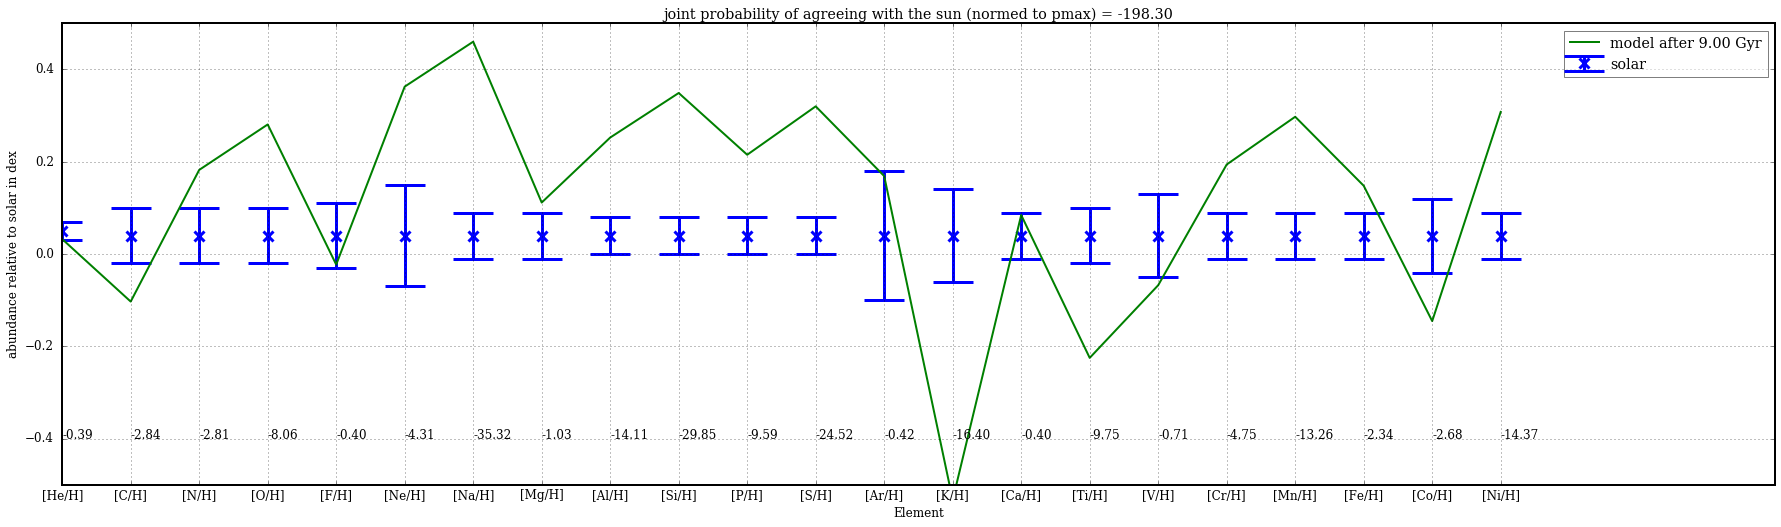

In [4]:
a.testing_output = True
a.summary_pdf = True
a.observational_constraints_index = ['gas_reservoir','sn_ratio','sol_norm']
posterior, blobs = cem(a.p0,a)

[-2.46 -3.07 -0.8  -0.31  3.02  0.47 -0.11]
l:  -104.594642542 pr:  -1.92703333333 po:  -106.521675875


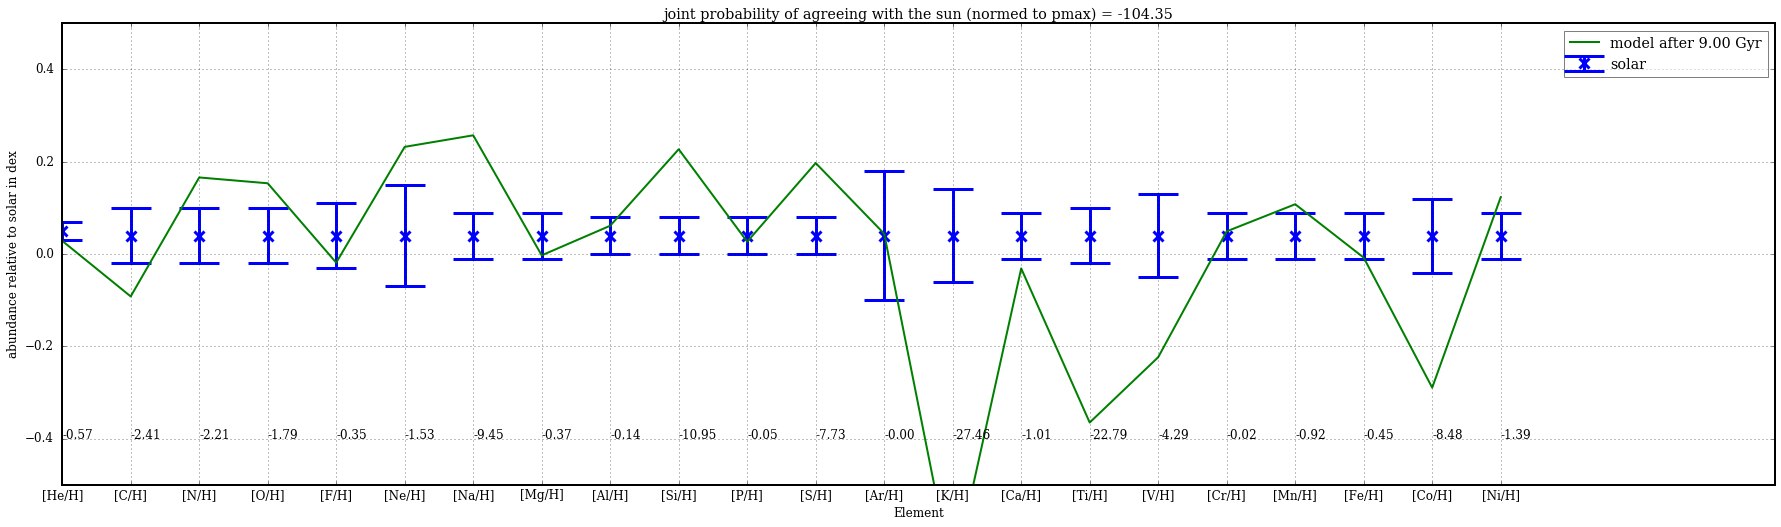

In [5]:
a.p0 = np.array([-2.46, -3.07, -0.8, -0.31, 3.02, 0.47, -0.11])
posterior, blobs = cem(a.p0,a)

## MCMC workflow
A full MCMC sampling of the 7 dimensional parameter space of the paper is too much for this tutorial (though we attach an MCMC chain and visualise the result later). For now we do a little inference for less parameters, lets say high-mass slope and number of SN Ia. This will have to run for a bit, but you can also just use the example uploaded in the github repository.

In [6]:
from wrapper import mcmc
a.nwalkers = 4
a.ndim = 2
a.to_optimize = np.array(['high_mass_slope', 'log10_N_0'])
a.p0 = np.array([-2.29 ,-2.75])
#mcmc(a) ### An example chain is already in the folder. Otherwise it takes about 15 minutes to run this chain on a laptop

In [8]:
from plot_mcmc import restructure_chain

NameError: name 'directory_name' is not defined